In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
df = pd.read_csv(r"/content/data.csv")

In [10]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [12]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [14]:
import pickle as pkl

In [15]:
df.shape

(4600, 18)

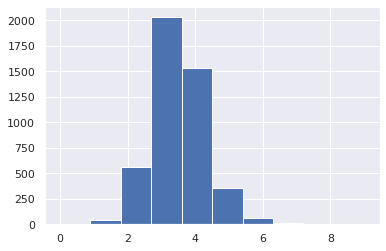

In [16]:
plt.hist(df.bedrooms,bins=10);

In [17]:
objects = ["country","city"]

In [18]:
X = df[objects]
y = df["price"]

In [19]:
X.head()

,country,city
0,USA,Shoreline
1,USA,Seattle
2,USA,Kent
3,USA,Bellevue
4,USA,Redmond


In [20]:
model = Pipeline([("one hot encoder", OneHotEncoder()),("liner regression",LinearRegression())])

In [21]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state = 0)

In [22]:
model.fit(Xtrain,ytrain)

Pipeline(steps=[('one hot encoder', OneHotEncoder()),
                ('liner regression', LinearRegression())])

In [23]:
ypred = model.predict(Xtest)

## Hence this code is just to showcase the process of making a Pipeline, we didn't do much Preprocessing, Feature Engineering or Hyperparameter tuning in this dataset. Therefore, the accuracy of the model would be low. 

In [24]:
model.score(Xtest,ytest)

0.2708791813219591

In [25]:
r2_score(ytest,ypred)

0.2708791813219591

In [26]:
mean_squared_error(ytest,ypred)

107872275277.03601

In [27]:
rmse = np.power(mean_squared_error(ytest,ypred),0.5)

In [28]:
rmse

328439.15003701375

In [29]:
export = open("house_price using regression.pkl","wb")
pkl.dump(model,export)

In [30]:
!pip install fastapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 6.0 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=c9822970110a67c7eb9983df7dd106a995abc5c45960a4bde9c6c39808d74c99
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [65]:
!pip install uvicorn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 58 kB 6.3 MB/s 


In [1]:
from fastapi import FastAPI
import nest_asyncio
from pyngrok import ngrok
import uvicorn

app = FastAPI()

@app.get("/index")
async def home():
  return "Hello World"

ngrok_tunnel = ngrok.connect(8000)
print("Public URL ",ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app,port=8000)

INFO:     Started server process [834]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


Public URL  http://938f-34-125-220-131.ngrok.io
INFO:     136.226.255.24:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     136.226.255.24:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     136.226.255.24:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     136.226.255.24:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     136.226.255.24:0 - "GET /home HTTP/1.1" 404 Not Found
INFO:     136.226.255.24:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     136.226.255.24:0 - "GET /index HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [834]


In [2]:
!pip install typing pydantic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 78 kB 3.5 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26325 sha256=a570d9897d7deb96635b04e945ac65c17ad1dd50c7209bd93bb94c0f1dc35397
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing


In [32]:
!ngrok authtoken {confidential authtoken}

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [38]:
from fastapi import FastAPI, Path
from typing import Optional
from pydantic import BaseModel
from pyngrok import ngrok
import uvicorn
import nest_asyncio

class data(BaseModel):
  note:str

app = FastAPI()

@app.get("/")
def index():
  return {"Health Check":"passed successfully"}

@app.post("/infermodel/{data}")
async def inference_conduct(country : data,city: data):
  print("country is",[country.note])
  print("city is",[city.note])
  prediction = model.predict([[country.note,city.note]])
  print(prediction)
  return(prediction[0])

ngrok_tunnel = ngrok.connect(8000)
print("Public URL ",ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app,port=8000)

Public URL  http://5ac5-34-125-220-131.ngrok.io


INFO:     Started server process [968]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     165.225.124.224:0 - "GET / HTTP/1.1" 200 OK
INFO:     165.225.124.224:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     165.225.124.224:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     165.225.124.224:0 - "GET /openapi.json HTTP/1.1" 200 OK
country is note='USA' ['USA']
city is note='Seattle' ['Seattle']
[586735.20291064]
INFO:     165.225.124.224:0 - "POST /infermodel/%7Bdata%7D HTTP/1.1" 200 OK


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  "X does not have valid feature names, but"


country is note='USA' ['USA']
city is note='Seattle' ['Seattle']
[586735.20291064]
INFO:     165.225.124.224:0 - "POST /infermodel/%7Bdata%7D HTTP/1.1" 200 OK


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  "X does not have valid feature names, but"


country is note='USA' ['USA']
city is note='Seattle' ['Seattle']
[586735.20291064]
INFO:     54.86.50.139:0 - "POST /infermodel/%7Bdata%7D HTTP/1.1" 200 OK


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  "X does not have valid feature names, but"
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [968]
